In [1]:
import pandas as pd
import numpy as np
import os

df1 = pd.read_csv('googleplaystore.csv') 
df1




,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [2]:
# dane = df1.iloc[: , :9] 
# dane = df1[['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Content Rating']].groupby(['App', 'Category', 'Rating', 'Size', 'Installs', 'Type', 'Content Rating']).mean().reset_index()
# dane


In [76]:
data = df1[['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Content Rating']].groupby(['App']).max().dropna().reset_index()
data["Installs"] = pd.to_numeric(data["Installs"].str.replace(",","").str.replace("+",""))
data["Reviews"] = pd.to_numeric(data["Reviews"])
mydata = data[['App',"Type",'Category', 'Content Rating', "Rating", "Reviews", "Installs"]]
mydata


C:\Users\andrz\AppData\Local\Temp/ipykernel_12804/578550136.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["Installs"] = pd.to_numeric(data["Installs"].str.replace(",","").str.replace("+",""))


,App,Type,Category,Content Rating,Rating,Reviews,Installs
0,+Download 4 Instagram Twitter,Free,SOCIAL,Everyone,4.5,40467,1000000
1,- Free Comics - Comic Apps,Free,COMICS,Mature 17+,3.5,115,10000
2,.R,Free,TOOLS,Everyone,4.5,259,10000
3,/u/app,Free,COMMUNICATION,Mature 17+,4.7,573,10000
4,058.ba,Free,NEWS_AND_MAGAZINES,Everyone,4.4,27,100
...,...,...,...,...,...,...,...
8191,감성학원 BL 첫사랑,Free,COMICS,Everyone,4.4,190,10000
8192,💎 I'm rich,Paid,LIFESTYLE,Everyone,3.8,718,10000
8193,"💘 WhatsLov: Smileys of love, stickers and GIF",Free,SOCIAL,Everyone,4.6,22098,1000000
8194,📏 Smart Ruler ↔️ cm/inch measuring for homework!,Free,TOOLS,Everyone,4.0,19,10000


In [16]:
#sprawdzanie czy sa duble

mydata['App'].duplicated().sum()


0

Text(0.5, 0, 'Rating')

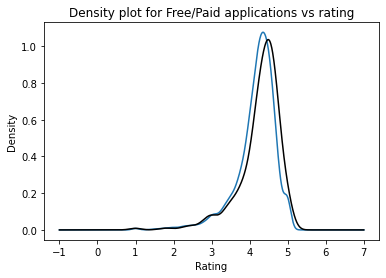

In [19]:
data_type = mydata[['App', 'Type', 'Rating', 'Installs', 'Reviews']]
# avg_rt =data_type.groupby(by='Type').mean()['Rating']
# avg_rt
free_type =data_type[data_type['Type']== 'Free']
paid_type =data_type[data_type['Type']== 'Paid']

import matplotlib.pyplot as plt


free_type['Rating'].plot.density()
paid_type['Rating'].plot.density(color = 'k')
plt.title('Density plot for Free/Paid applications vs rating')
plt.xlabel('Rating')



In [21]:

#obliczenia outliners dla Reviews 
data_type.groupby(by='Type').describe()['Reviews']
q1 =data_type.quantile(0.25)['Reviews']
q3 =data_type.quantile(0.75)['Reviews']
iqr = q3 - q1
lower_bound = (q1 - 1.5*iqr)
upper_bound = (q3 + 1.5*iqr)
print(iqr, lower_bound, upper_bound)

num_of_outliers_L = (data_type['Reviews']< lower_bound).sum()
num_of_outliers_U = (data_type['Reviews']> upper_bound).sum()

print(num_of_outliers_L, num_of_outliers_U)


43593.5 -65264.25 109109.75
0 1388


Text(0.5, 0, 'Reviews')

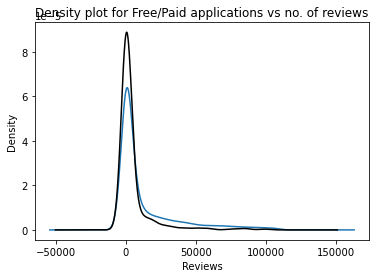

In [22]:
#wybranie danych nie będacymi outlines
sorted_data= data_type[(data_type['Reviews'] < upper_bound) & (data_type['Reviews'] > lower_bound)]

free_type_s =sorted_data[sorted_data['Type']== 'Free']
paid_type_s =sorted_data[sorted_data['Type']== 'Paid']

import matplotlib.pyplot as plt
import seaborn as sns


free_type_s['Reviews'].plot.density()
paid_type_s['Reviews'].plot.density(color = 'k')
plt.title('Density plot for Free/Paid applications vs no. of reviews')
plt.xlabel('Reviews')


In [ ]:
#statystyka po usunięciu outlines
sorted_data.groupby(by='Type').describe()['Reviews']

In [24]:
#sprawdzanie outlines - inna metoda - sigma (to ma zastosowanie tylko do rozkładów normlanych, najprawdopodobniej nie jest aplikowalne)
sigma = data_type['Reviews'].std()
srednia = data_type['Reviews'].mean()

low_boundary = (srednia - 3*sigma)
upp_boundary = (srednia + 3*sigma)

numb_of_otliers_L = (data_type['Reviews'] < low_boundary).sum()
numb_of_otliers_U = (data_type['Reviews'] > upp_boundary).sum()

print(numb_of_otliers_L, numb_of_otliers_U)

0 57


<AxesSubplot:ylabel='Density'>

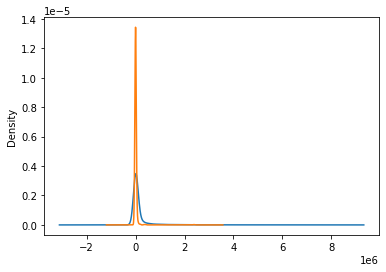

In [25]:
sorted_data_sigma= data_type[(data_type['Reviews'] < upp_boundary) & (data_type['Reviews'] > low_boundary)]

free_type_ss =sorted_data_sigma[sorted_data_sigma['Type']== 'Free']
paid_type_ss =sorted_data_sigma[sorted_data_sigma['Type']== 'Paid']

import matplotlib.pyplot as plt
import seaborn as sns


free_type_ss['Reviews'].plot.density()
paid_type_ss['Reviews'].plot.density()

#wykres nie jest czytelny - tylko 3 outlines, metodyka nie ma znaczenia/zastosowania?

In [27]:
#obliczenia outliners dla Installs 
data_type.groupby(by='Type').describe()['Installs']
q1_i =data_type.quantile(0.25)['Installs']
q3_i =data_type.quantile(0.75)['Installs']
iqr_i = q3_i - q1_i
lower_bound_i = (q1_i - 1.5*iqr_i)
upper_bound_i = (q3_i + 1.5*iqr_i)
print(iqr_i, lower_bound_i, upper_bound_i)

num_of_outliers_L_i = (data_type['Installs']< lower_bound_i).sum()
num_of_outliers_U_i = (data_type['Installs']> upper_bound_i).sum()

print(num_of_outliers_L_i, num_of_outliers_U_i)
data_type.groupby(by='Type').describe()['Installs']

#pytanie czy outlines jest dobrze policzone? wychodzi 2050 outlines w górnym pułapie... bez tych obliczń wykres jest nieczytelny jednak...

990000.0 -1475000.0 2485000.0
0 1979


,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Free,7592.0,9.896447e+06,6.046887e+07,1.0,10000.0,500000.0,5000000.0,1.000000e+09
Paid,604.0,2.606794e+05,4.109337e+06,1.0,1000.0,5000.0,50000.0,1.000000e+08


<AxesSubplot:ylabel='Density'>

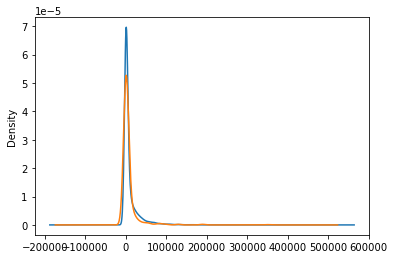

In [28]:
#wybranie danych nie będace outlines - wykres nieczytelny...

sorted_data_i= data_type[(data_type['Installs'] < upper_bound_i) & (data_type['Installs'] > lower_bound_i)]

free_type_si =sorted_data_i[sorted_data_i['Type']== 'Free']
paid_type_si =sorted_data_i[sorted_data_i['Type']== 'Paid']


free_type_si['Reviews'].plot.density()
paid_type_si['Reviews'].plot.density()

<AxesSubplot:ylabel='Density'>

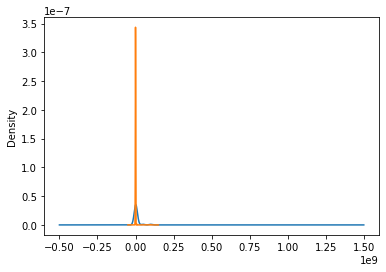

In [29]:
#bez usuwania outlines dla Installs

free_type =data_type[data_type['Type']== 'Free']
paid_type =data_type[data_type['Type']== 'Paid']

import matplotlib.pyplot as plt
import seaborn as sns


free_type['Installs'].plot.density()
paid_type['Installs'].plot.density()


App  Rating  Reviews
Installs   Type                       
1          Free     1       1        1
           Paid     2       2        2
5          Free     9       9        9
10         Free    51      51       51
           Paid    18      18       18
50         Free    42      42       42
           Paid    14      14       14
100        Free   237     237      237
           Paid    65      65       65
500        Free   163     163      163
           Paid    36      36       36
1000       Free   566     566      566
           Paid   130     130      130
5000       Free   360     360      360
           Paid    65      65       65
10000      Free   870     870      870
           Paid   117     117      117
50000      Free   417     417      417
           Paid    40      40       40
100000     Free  1013    1013     1013
           Paid    83      83       83
500000     Free   493     493      493
           Paid    11      11       11
1000000    Free  1394    1394     1394
           Paid    20      20       20
5000000    Free   608     608      608
10000000   Free   932     932      932
           Paid     2       2        2
50000000   Free   204     204      204
100000000  Free   188     188      188
           Paid     1       1        1
500000000  Free    24      24       24
1000000000 Free    20      20       20

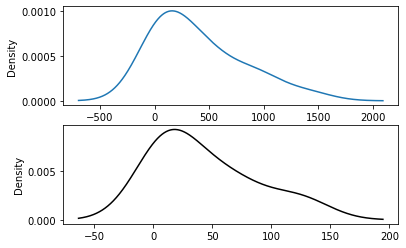

In [30]:
#przebieg dla Installs - zestawinie w 'klasie' ilości pobrań i sprawdzenie częstotliwości 'klasy' - bardziej informacyjnie niż do użycia
data_type.groupby(['Installs', 'Type']).count()


free_instal =data_type[data_type['Type']== 'Free'].groupby('Installs').count()['App']
paid_instal =data_type[data_type['Type']== 'Paid'].groupby('Installs').count()['App']


plt.subplot(2,1,1)
free_instal.plot.density()
plt.subplot(2,1,2)
paid_instal.plot.density(color = 'k')
data_type.groupby(['Installs', 'Type']).count()



count    7.592000e+03
mean     9.896447e+06
std      6.046887e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64
count    6.040000e+02
mean     2.606794e+05
std      4.109337e+06
min      1.000000e+00
25%      1.000000e+03
50%      5.000000e+03
75%      5.000000e+04
max      1.000000e+08
Name: Installs, dtype: float64


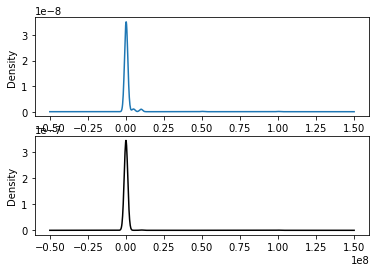

In [31]:
#przebieg dla 'Installs' bez usuwania outlines - na dwóch różnych wykresach

plt.subplot(2,1,1)
free_type['Installs'].plot.density()
plt.subplot(2,1,2)
paid_type['Installs'].plot.density(color = 'k')

print(free_type['Installs'].describe())
print(paid_type['Installs'].describe())

<AxesSubplot:>

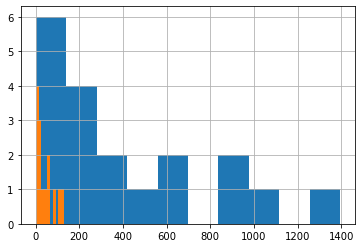

In [32]:
#histogram dla Installs tylko po to zeby porównać dokładniej powyższe przebiegi

free_instal.hist()
paid_instal.hist()

In [33]:
data_type['Installs'].max()

1000000000

In [34]:
max_data= data_type[data_type['Installs'] ==data_type['Installs'].max()] #zestawienie aplikacji o największej liczbie pobrań

max_data_r =max_data[max_data['Reviews']== max_data['Reviews'].max()] #aplikacja najbardziej popularna (rozważanie pod kątem free/paid) // Subway Surfers
max_data_r

max_data_rt =max_data[max_data['Rating']== max_data['Rating'].max()] #aplikacje najbardziej popularne najlepiej ocenianie // Subway Surfers
print(max_data_rt['App'])
print('----------')
print(max_data_r['App'])
max_data_rt

4007     Google Photos
4422         Instagram
6807    Subway Surfers
Name: App, dtype: object
----------
3432    Facebook
Name: App, dtype: object


,App,Type,Rating,Installs,Reviews
4007,Google Photos,Free,4.5,1000000000,10859051
4422,Instagram,Free,4.5,1000000000,66577446
6807,Subway Surfers,Free,4.5,1000000000,27725352


In [35]:


max_data_f= free_type[free_type['Installs'] ==free_type['Installs'].max()]
max_data_f

max_data_p = paid_type[paid_type['Installs']== paid_type['Installs'].max()]
sts_max = max_data_f['Installs'].unique()[0] / max_data_p['Installs'].unique()[0]
sts_max #aplikacja o największej liczny pobrań należąca do kategorii darmowe jest 100 razy bardziej popularna niż aplikacja najczęściej pobierana płatna

10.0

In [36]:
#suma pobrań aplikacji płatnej / darmowej względem ilości takich aplikacji

sum_free = data_type[data_type['Type']== 'Free']['Installs'].sum()
no_free = len(data_type[data_type['Type']== 'Free'])
sum_paid = data_type[data_type['Type']== 'Paid']['Installs'].sum()
no_paid = len(data_type[data_type['Type']== 'Paid'])

wsp_free = round(sum_free/no_free, 2)
wsp_paid = round(sum_paid/no_paid, 2)
print(f'Stosunek ilości pobrań do ilości aplikacji w bazie dla aplikacji damrowych wynosi :{wsp_free}, natomiast dla płatnych: {wsp_paid}')

Stosunek ilości pobrań do ilości aplikacji w bazie dla aplikacji damrowych wynosi :9896446.77, natomiast dla płatnych: 260679.44


In [37]:
sum_free_r = data_type[data_type['Type']== 'Free']['Reviews'].sum()
no_free = len(data_type[data_type['Type']== 'Free'])
sum_paid_r = data_type[data_type['Type']== 'Paid']['Reviews'].sum()
no_paid = len(data_type[data_type['Type']== 'Paid'])

wsp_free_r = round(sum_free_r/no_free, 2)
wsp_paid_r = round(sum_paid_r/no_paid, 2)
print(f'Stosunek ilości recenzji do ilości aplikacji w bazie dla aplikacji damrowych wynosi :{wsp_free_r}, natomiast dla płatnych: {wsp_paid_r}')

Stosunek ilości recenzji do ilości aplikacji w bazie dla aplikacji damrowych wynosi :274686.52, natomiast dla płatnych: 10919.57


In [38]:
avg_free = data_type[data_type['Type']== 'Free']['Rating'].mean()
avg_paid = data_type[data_type['Type']== 'Paid']['Rating'].mean()


print(f'Średnia ocena aplikacji darmowej to : {avg_free}, natomiast płatnej to: {avg_paid}')

Średnia ocena aplikacji darmowej to : 4.166504214963111, natomiast płatnej to: 4.26241721854304


In [39]:
data_type.corr(method='pearson') #badanie korelacji

,Rating,Installs,Reviews
Rating,1.000000,0.040254,0.055035
Installs,0.040254,1.000000,0.623897
Reviews,0.055035,0.623897,1.000000


In [40]:
#statystyka - bez usuniecia outlines

s1 = data_type.groupby(by='Type').describe()['Rating']
s2 = data_type.groupby(by='Type').describe()['Reviews']
s3 = data_type.groupby(by='Type').describe()['Installs']

s1

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Free,7592.0,4.166504,0.534214,1.0,4.0,4.3,4.5,5.0
Paid,604.0,4.262417,0.555863,1.0,4.1,4.4,4.6,5.0


<AxesSubplot:>

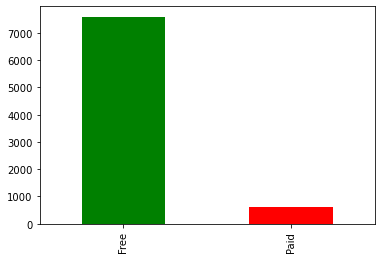

In [49]:

mydata['Type'].value_counts().plot(kind='bar', color=('green', 'red'))

In [46]:
# top 10 według 'Count' of RATING in Category
cat_descibe = free_type[["App","Installs", 'Type']].groupby("Type").describe().reset_index()
cat_descibe.columns = cat_descibe.columns.droplevel()
cat_descibe = cat_descibe.sort_values("count", ascending=False)
cat_descibe.iloc[:10,0:4]

,,count,mean,std
0,Free,7592.0,9.896447e+06,6.046887e+07


In [75]:
top_10_free =free_type.sort_values(['Installs',"Reviews"], ascending=False).iloc[:10]

top_10_free



,App,Type,Rating,Installs,Reviews
3432,Facebook,Free,4.1,1000000000,78158306
7665,WhatsApp Messenger,Free,4.4,1000000000,69119316
4422,Instagram,Free,4.5,1000000000,66577446
5096,Messenger – Text and Video Chat for Free,Free,4.0,1000000000,56646578
6807,Subway Surfers,Free,4.5,1000000000,27725352
7834,YouTube,Free,4.3,1000000000,25655305
4007,Google Photos,Free,4.5,1000000000,10859051
6592,Skype - free IM & video calls,Free,4.1,1000000000,10484169
3991,Google Chrome: Fast & Secure,Free,4.3,1000000000,9643041
5000,Maps - Navigate & Explore,Free,4.3,1000000000,9235373


In [73]:
top_10_cat =data[data["Category"] == "FAMILY"].sort_values(["Installs","Reviews"], ascending=False).iloc[:10]

In [72]:
data[data["Type"] == "Paid"].sort_values(['Installs',"Reviews"], ascending=False).iloc[:10] #jako ciekawostka

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating
1829,Calculator,TOOLS,4.3,57,Varies with device,100000000,Paid,Everyone
5135,Minecraft,FAMILY,4.5,2376564,Varies with device,10000000,Paid,Everyone 10+
4236,Hitman Sniper,GAME,4.6,408292,29M,10000000,Paid,Mature 17+
4030,Grand Theft Auto: San Andreas,GAME,4.4,348962,26M,1000000,Paid,Mature 17+
1374,Bloons TD 5,FAMILY,4.6,190086,94M,1000000,Paid,Everyone
7675,Where's My Water?,FAMILY,4.7,188740,69M,1000000,Paid,Everyone
1919,Card Wars - Adventure Time,FAMILY,4.3,129603,23M,1000000,Paid,Everyone 10+
7288,True Skate,SPORTS,4.4,129409,73M,1000000,Paid,Everyone
3581,Five Nights at Freddy's,GAME,4.6,100805,50M,1000000,Paid,Teen
1204,Beautiful Widgets Pro,PERSONALIZATION,4.2,97890,14M,1000000,Paid,Everyone
